## 9-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
### 1. 데이터 가져오기  
    터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
    여기에서 데이터를 상세히 확인할 수 있습니다.
### 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
    to_datetime 활용 : 링크 참조
    pandas datetime extract year month day 키워드로 검색해 보기
### 3. year, month, day, hour, minute, second 데이터 개수 시각화하기  
    sns.countplot 활용해서 시각화하기
    subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
### 4. X, y 컬럼 선택 및 train/test 데이터 분리  
    X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
    count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
### 5. LinearRegression 모델 학습  
    sklearn의 LinearRegression 모델 불러오기 및 학습하기
### 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  
    학습된 모델에 X_test를 입력해서 예측값 출력하기
    모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
    mse 값과 함께 rmse 값도 계산하기
### 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  
    x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
    x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [12]:
# 1. 데이터 가져오기
data_train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
train = data_train.copy()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
# 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])
train['yyyy'] = train['datetime'].dt.year
train['mm'] = train['datetime'].dt.month
train['dd'] = train['datetime'].dt.day
train['hh'] = train['datetime'].dt.hour
train['min'] = train['datetime'].dt.minute
train['sec'] = train['datetime'].dt.second

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  yyyy        10886 non-null  int64         
 13  mm          10886 non-null  int64         
 14  dd          10886 non-null  int64         
 15  hh          10886 non-null  int64         
 16  min         10886 non-

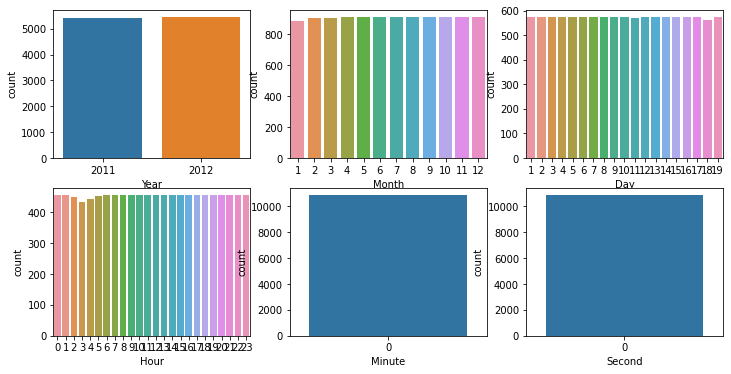

In [24]:
## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
sns.countplot(ax=axs[0, 0], x=train['yyyy']).set_xlabel('Year')
sns.countplot(ax=axs[0, 1], x=train['mm']).set_xlabel('Month')
sns.countplot(ax=axs[0, 2], x=train['dd']).set_xlabel('Day')
sns.countplot(ax=axs[1, 0], x=train['hh']).set_xlabel('Hour')
sns.countplot(ax=axs[1, 1], x=train['min']).set_xlabel('Minute')
sns.countplot(ax=axs[1, 2], x=train['sec']).set_xlabel('Second')
plt.show()

In [31]:
data_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [38]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']
X = train[features]
y = train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test) # 예측값 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('mse  :',mse)
print('rmse :', rmse)

mse  : 23906.814693176104
rmse : 154.61828705937762


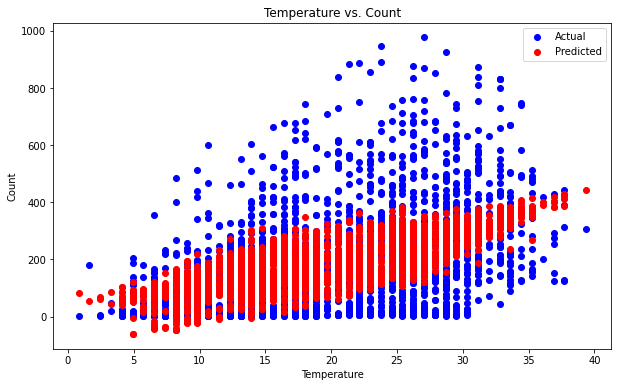

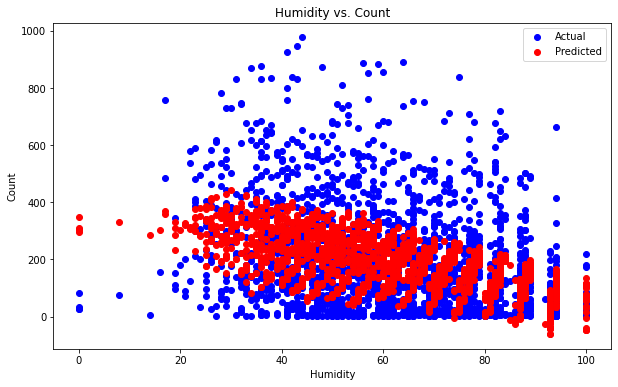

In [43]:
# temp에 대한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, label="Actual", color='blue')
plt.scatter(X_test['temp'], y_pred, label="Predicted", color='red')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs. Count')
plt.legend()
plt.show()

# humidity에 대한 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, label="Actual", color='blue')
plt.scatter(X_test['humidity'], y_pred, label="Predicted", color='red')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs. Count')
plt.legend()
plt.show()